In [15]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import string
import seaborn as sns
import datetime as dt

%matplotlib inline

In [16]:
ee_results = pd.read_csv('../../Analyses/Expert-elicitation/Outputs/results_December_2019_cm.csv')
ee_results['date'] = pd.to_datetime(ee_results['date'], dayfirst=True)
ee_results_2 = ee_results[ee_results.p_cm == ">=2"]
ee_results_6 = ee_results[ee_results.p_cm == ">=6"]
ee_results_10 = ee_results[ee_results.p_cm == ">=10"]
ee_results_20 = ee_results[ee_results.p_cm == ">=20"]

In [17]:
expert_dates = dict([list(np.array(ee_results[['expert', 'date']][ee_results.expert == e])[1]) for e in np.sort(ee_results.expert.unique())],
            columns=['expert', 'date'])

In [18]:
import colorsys
N = 10
HSV_tuples = [(x*1.0/N, 0.5, 0.5) for x in range(N)]
RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)

In [29]:
forecast_frame_list = [pd.read_csv("forecasts/ebola_risks_" + dt.datetime.strftime(expert_dates[e], "%Y-%m-%d") + ".csv") for e in np.sort(ee_results.expert.unique())]

In [30]:
capitalize = lambda a : a.upper()

In [31]:
HZs = forecast_frame_list[0].ADM2_NAME.apply(capitalize)

In [32]:
forecast_frame_list_trunc = [f[[hz in ee_results.HZ.unique() for hz in HZs]] for f in forecast_frame_list]


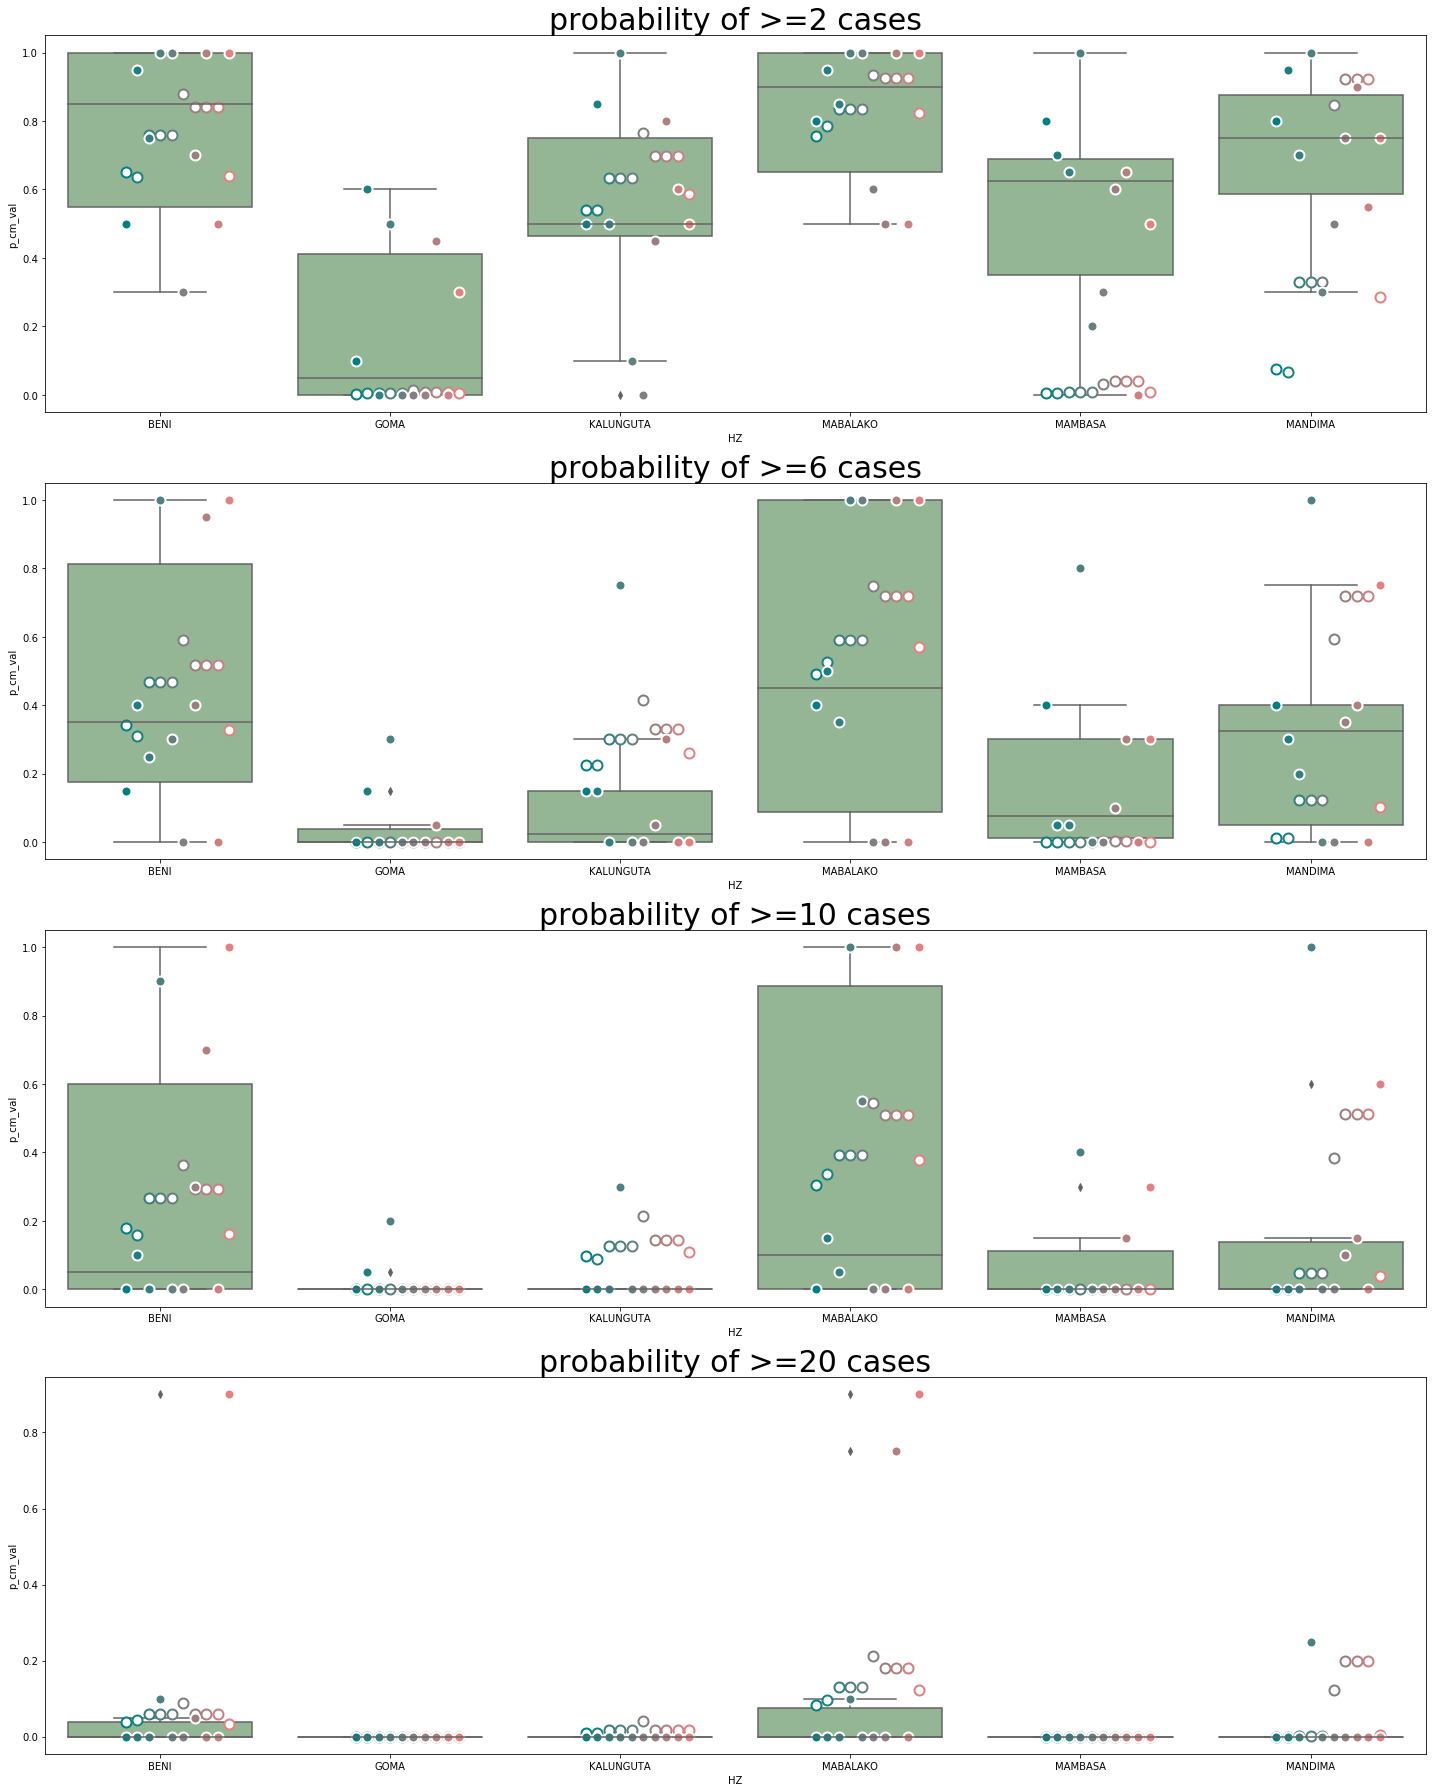

In [33]:
fig = plt.figure(figsize=[20,25])
ax = fig.add_subplot(411)
sns.boxplot(data = ee_results_2, x="HZ", y="p_cm_val", ax=ax, color="DarkSeaGreen")
for i, f in enumerate(forecast_frame_list_trunc):
    plt.plot(np.arange(0,6)-0.15+i/20, f.risk_TH_2, 'o', ms=10, mfc="White", mew=2, color=HSV_tuples[i])
    plt.plot(np.arange(0,6)-0.15+i/20, ee_results_2.sort_values(by='HZ').p_cm_val[ee_results_2.expert == i+1], 'o', ms=10, mec="white", mew=2, color=HSV_tuples[i])
ax.set_title("probability of >=2 cases", fontsize=30)
    
ax = fig.add_subplot(412)
sns.boxplot(data = ee_results_6, x="HZ", y="p_cm_val", ax=ax, color="DarkSeaGreen")
for i, f in enumerate(forecast_frame_list_trunc):
    plt.plot(np.arange(0,6)-0.15+i/20, f.risk_TH_6, 'o', ms=10, mfc="White", mew=2, color=HSV_tuples[i])
    plt.plot(np.arange(0,6)-0.15+i/20, ee_results_6.sort_values(by='HZ').p_cm_val[ee_results_6.expert == i+1], 'o', ms=10, mec="white", mew=2, color=HSV_tuples[i])
ax.set_title("probability of >=6 cases", fontsize=30)    

ax = fig.add_subplot(413)
sns.boxplot(data = ee_results_10, x="HZ", y="p_cm_val", ax=ax, color="DarkSeaGreen")
for i, f in enumerate(forecast_frame_list_trunc):
    plt.plot(np.arange(0,6)-0.15+i/20, f.risk_TH_10, 'o', ms=10, mfc="White", mew=2, color=HSV_tuples[i])
    plt.plot(np.arange(0,6)-0.15+i/20, ee_results_10.sort_values(by='HZ').p_cm_val[ee_results_10.expert == i+1], 'o', ms=10, mec="white", mew=2, color=HSV_tuples[i])
ax.set_title("probability of >=10 cases", fontsize=30)    
    
    
    
ax = fig.add_subplot(414)
sns.boxplot(data = ee_results_20, x="HZ", y="p_cm_val", ax=ax, color="DarkSeaGreen",  labels=None)
for i, f in enumerate(forecast_frame_list_trunc):
    plt.plot(np.arange(0,6)-0.15+i/20, f.risk_TH_20, 'o', ms=10, mfc="White", mew=2, color=HSV_tuples[i])
    plt.plot(np.arange(0,6)-0.15+i/20, ee_results_20.sort_values(by='HZ').p_cm_val[ee_results_20.expert == i+1], 'o', ms=10, mec="white", mew=2, color=HSV_tuples[i])
ax.set_title("probability of >=20 cases", fontsize=30)    

fig.patch.set_facecolor('white')    
    
fig.tight_layout()
